# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Programação para Ciência de Dados</font>

## <font color="blue">Avaliação Final</font>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos. A última questão é um bônus e se respondida corretamente pode ajudar na nota final, ou seja, caso tenha respondido incorretamente uma das questões de 1 a 4, mas tenha acertado a questão bônus, ainda poderá atingir 10 pontos.

<font color='red'>**ATENÇÃO:** Quando terminar o exame, você deve fazer um "upload" do notebook no _moodle_</font>.

Para responder as questões abaixo será necessário fazer uso do arquivo <font style="font-family: monaco">covid.csv"</font> disponível para download no _moodle_. As colunas do conjunto de dados fornecem informações sobre:
- **'Country/Region'**: país onde os casos de COVID19 foram registrados
- **'Lat'** e **'Long'**: latitude e longitude de referência
- **'Date'**: data dos registros
- **'Value'**: quantidade acumulada de casos registrados

In [1]:
import numpy as np
import pandas as pd

### Questão 1 (2 pontos)
Considerando os dados contidos no arquivo <font style="font-family: monaco">covid.csv"</font>:


#### a) (0.5 pontos)
Carregue o arquivo "covid.csv" e armazena em um pandas DataFrame.

In [2]:
df = pd.read_csv('covid.csv')
print('Linhas x colunas:', df.shape)
df.head()

Linhas x colunas: (26335, 5)


,Country/Region,Lat,Long,Date,Value
0,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num
1,afghanistan,33,65,2020-03-18,22
2,afghanistan,33,65,2020-03-17,22
3,afghanistan,33,65,2020-03-16,21
4,Afghanistan,33,65,2020-03-15,16


#### b) (0.5 pontos)
Elimine a primeira linha do DataFrame, a qual contém a informação:
```python
#adm1+name,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num
```

In [3]:
# Dropping row by index
df.drop(index=0, inplace=True)
df.head()

,Country/Region,Lat,Long,Date,Value
1,afghanistan,33,65,2020-03-18,22
2,afghanistan,33,65,2020-03-17,22
3,afghanistan,33,65,2020-03-16,21
4,Afghanistan,33,65,2020-03-15,16
5,afghanistan,33,65,2020-03-14,11


#### c) (1 ponto)
Verifique qual o tipo de dado da coluna "Value" e converta o tipo para inteiro (<font color='blue'>int</font>).

In [4]:
print('Tipo de dado da coluna "Value" antes da conversão:', df.Value.dtype)
df['Value'] = pd.to_numeric(df['Value'], downcast='integer')
print('Tipo de dado da coluna "Value" após a conversão:', df.Value.dtype)

Tipo de dado da coluna "Value" antes da conversão: object
Tipo de dado da coluna "Value" após a conversão: int64


### Questão 2 (2 pontos)
Devido a um erro de armazenamento de inteiros, alguns países apresentam mais de 8 bilhões de casos de COVID19 (valor da coluna "Value" maior ou igual a 8.000.000.000) 

Elimine as linhas onde o número de casos é maior ou igual a 8 bilhões.

In [5]:
print('Buscando valores na coluna "Value" maiores ou iguais a 8 bilhões:')
df.loc[df['Value'] >= 8000000000]

Buscando valores na coluna "Value" maiores ou iguais a 8 bilhões:


,Country/Region,Lat,Long,Date,Value
532,Australia,-33.8688,151.2093,2020-02-29,8000003346
1465,bolivia,-16.2902,-63.5887,2020-02-08,8000006997
3650,china,43.6661,126.1923,2020-03-17,8000009333
5789,France,3.9339,-53.1258,2020-02-16,8000002934
6124,France,18.0708,-63.0501,2020-02-23,8000007742
6759,Holy See,41.9029,12.4534,2020-02-15,8000005656
9928,romania,45.9432,24.9668,2020-03-09,8000002449
10950,suriname,3.9193,-56.0278,2020-03-13,8000000828
11500,tunisia,34,9,2020-02-05,8000005897
14971,US,35.4437,139.638,2020-02-11,8000001204


In [6]:
# Eliminando as linhas onde o número de casos é maior ou igual a 8 bilhões
df = df.drop( df[ df['Value'] > 8000000000 ].index, axis=0)

print('Confirmando que a eliminação foi bem sucedida:')
print('Linhas x colunas:', df.shape)
df.loc[df['Value'] >= 8000000000]


Confirmando que a eliminação foi bem sucedida:
Linhas x colunas: (26315, 5)


,Country/Region,Lat,Long,Date,Value


### Questão 3 (3 pontos)
Qual registro contém o maior número de infectados? Exiba a data e o país deste registro

In [7]:
# Ordenando a quantidade de infectados pela coluna 'Value'
infectados = df['Value'].sort_values(ascending=False)
infectados

3364     67800
3365     67799
3366     67798
3367     67794
3368     67790
         ...  
17027        0
17028        0
17029        0
17030        0
13167        0
Name: Value, Length: 26315, dtype: int64

In [8]:
print('Registro com o maior número de infectados:\n', df.loc[df['Value'].idxmax(), ['Date', 'Country/Region', 'Value']])

Registro com o maior número de infectados:
 Date              2020-03-18
Country/Region         china
Value                  67800
Name: 3364, dtype: object


### Questão 4 (3 pontos)
Quais são os três países com a maior quantidade acumulada de infectados?

Note que o nome dos países podem aparecer com letras maiúsculas ou minusculas, portanto é necessários fazer uma padronização antes de calcular o gráfico.

**DICA:** groupby + max

In [9]:
# Verificando os valores únicos da coluna 'Country/Region'
print("Quantidade de valores únicos para 'Country/Region' antes da conversão:", df['Country/Region'].nunique())
# Convertendo para minúsculas
df['Country/Region'] = df['Country/Region'].str.lower()
print("Quantidade de valores únicos para 'Country/Region' após a conversão:", df['Country/Region'].nunique())
# Verificando se a substituição foi bem feita
print("\n'Country/Region' convertidos para letra minúscula:")
df['Country/Region'].unique()

Quantidade de valores únicos para 'Country/Region' antes da conversão: 304
Quantidade de valores únicos para 'Country/Region' após a conversão: 152

'Country/Region' convertidos para letra minúscula:


array(['afghanistan', 'albania', 'algeria', 'andorra',
       'antigua and barbuda', 'argentina', 'armenia', 'australia',
       'austria', 'azerbaijan', 'bahrain', 'bangladesh', 'barbados',
       'belarus', 'belgium', 'benin', 'bhutan', 'bolivia',
       'bosnia and herzegovina', 'brazil', 'brunei', 'bulgaria',
       'burkina faso', 'cambodia', 'cameroon', 'canada',
       'central african republic', 'chile', 'china', 'colombia',
       'congo (brazzaville)', 'congo (kinshasa)', 'costa rica',
       "cote d'ivoire", 'croatia', 'cruise ship', 'cuba', 'cyprus',
       'czechia', 'denmark', 'djibouti', 'dominican republic', 'ecuador',
       'egypt', 'equatorial guinea', 'estonia', 'eswatini', 'ethiopia',
       'finland', 'france', 'gabon', 'gambia, the', 'georgia', 'germany',
       'ghana', 'greece', 'greenland', 'guatemala', 'guinea', 'guyana',
       'holy see', 'honduras', 'hungary', 'iceland', 'india', 'indonesia',
       'iran', 'iraq', 'ireland', 'israel', 'italy', 'jamaica', 

In [10]:
# Verifica-se que existem países com mais do que um registro de 'Lat' e 'Long'
print("Quantidade de valores únicos para 'Country/Region':", df['Country/Region'].nunique())
print("Quantidade de valores únicos para 'Lat':", df['Lat'].nunique())
print("Quantidade de valores únicos para 'Long':", df['Long'].nunique())

Quantidade de valores únicos para 'Country/Region': 152
Quantidade de valores únicos para 'Lat': 453
Quantidade de valores únicos para 'Long': 439


In [11]:
# Agrupando 'Country/Region' e 'Date' com groupby() e somando os valores de cada dia com sum()
paises = df.groupby(['Country/Region', 'Date'])['Value'].sum().reset_index()
# Novo agrupamento 'Country/Region' no agrupamento acima com groupby() e selecionando 'Value' para calcular a soma de casos
mais_infectados = paises.groupby(['Country/Region'])['Value'].max()
# Ordenando os resultados com sort_values() e alterando a série com inplace
mais_infectados.sort_values(ascending=False, inplace=True)
# Exibindo os 3 países com a maior quantidade acumulada de infectados
mais_infectados[0:3]

Country/Region
china    81102
italy    35713
iran     17361
Name: Value, dtype: int64

In [12]:
print('Os 3 países com a maior quantidade acumulada de infectados são:')
print(mais_infectados.index[0], ',', mais_infectados.index[1], 'e', mais_infectados.index[2])

Os 3 países com a maior quantidade acumulada de infectados são:
china , italy e iran


### Questão Bonus (2 pontos)
Faça o gráfico do número de contaminados no Brasil e na Itália. Note que o nome dos países podem aparecer com letras maiúsculas ou minusculas, portanto é necessários fazer uma padronização antes de calcular o gráfico.

In [13]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26315 entries, 1 to 26334
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  26315 non-null  object        
 1   Lat             26315 non-null  object        
 2   Long            26315 non-null  object        
 3   Date            26315 non-null  datetime64[ns]
 4   Value           26315 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB


In [14]:
# Verificando que 'brazil' e 'italy' possuem regiões únicas de 'Lat' e 'Long'
print('brazil:\n', df[df['Country/Region'] == 'brazil'].nunique())
print('\nitaly:', df[df['Country/Region'] == 'italy'].nunique())

brazil:
 Country/Region     1
Lat                1
Long               1
Date              57
Value             15
dtype: int64

italy: Country/Region     1
Lat                1
Long               1
Date              57
Value             29
dtype: int64


In [15]:
# Criando os conjuntos de dados a serem plotados
df_br = df[df['Country/Region'] == 'brazil'].sort_values('Date')
df_it = df[df['Country/Region'] == 'italy'].sort_values('Date')

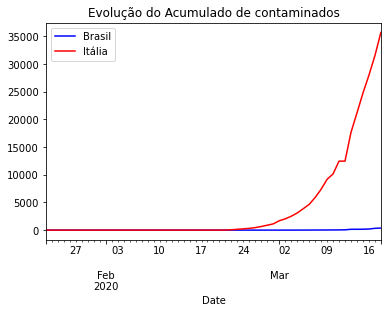

In [16]:
#  Plotando o gráfico
import matplotlib.pyplot as plt
ax = df_br.plot('Date', 'Value', label='Brasil', color='b', title='Evolução do Acumulado de contaminados')
df_it.plot('Date', 'Value', ax=ax, label='Itália', color='r')